## Ground Truth Test

In [19]:
import torch
import torchvision.transforms as transforms               # include image preprocess tools
from torchvision.datasets import CIFAR10        # for loading images from Pytorch CIFAR
from torch.utils.data import DataLoader
import detectors
import timm
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.temperature_scaling import ModelWithTemperature

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("vgg16_bn_cifar10", pretrained=True)
model = model.to(device)

# reprocess the images from CIFAR
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

Files already downloaded and verified
Before temperature - NLL: 0.425, ECE: 0.063
Optimal temperature: 4.904
After temperature - NLL: 0.921, ECE: 0.468


ModelWithTemperature(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, pa

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


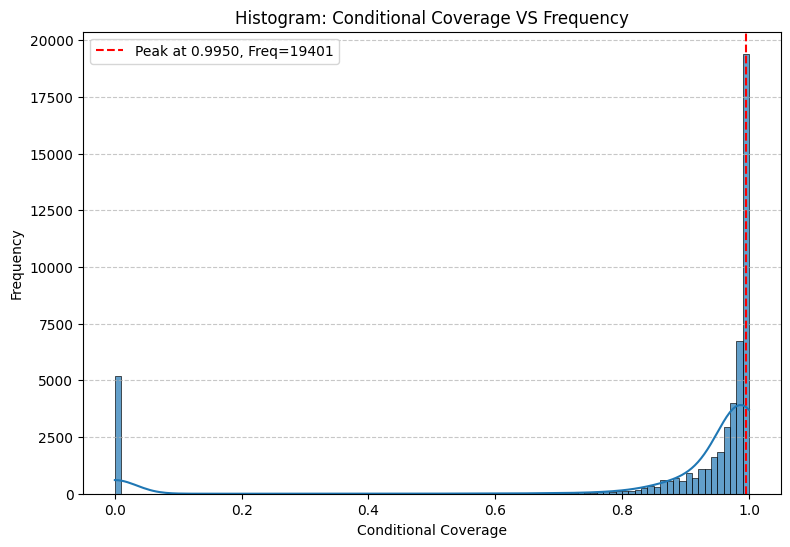

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.1)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8695 ± 0.0035
Final Average Prediction Set Size: 0.96 ± 0.01
Final Average Coverage: 0.8944 ± 0.0038
Final Average Real Probability: 0.8655 ± 0.0039


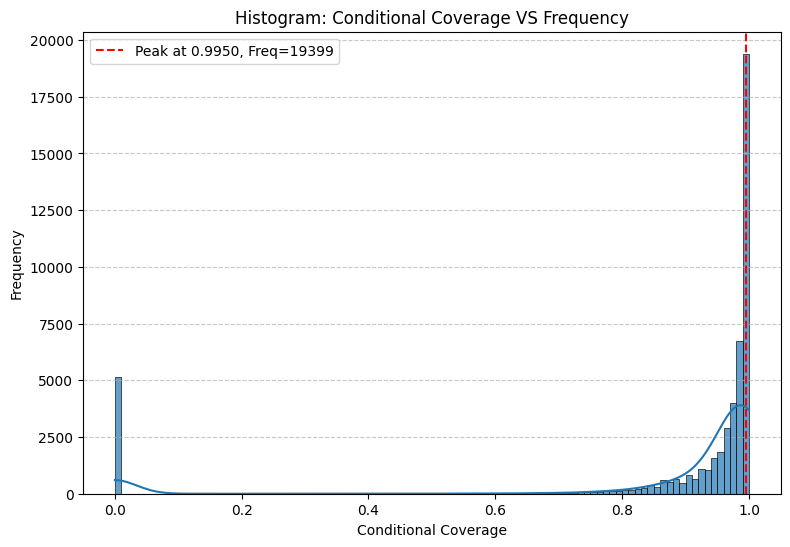

19399 (38.80%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8758 ± 0.0042
Final Average Prediction Set Size: 0.91 ± 0.00
Final Average Coverage: 0.8979 ± 0.0046
Final Average Real Probability: 0.8618 ± 0.0046


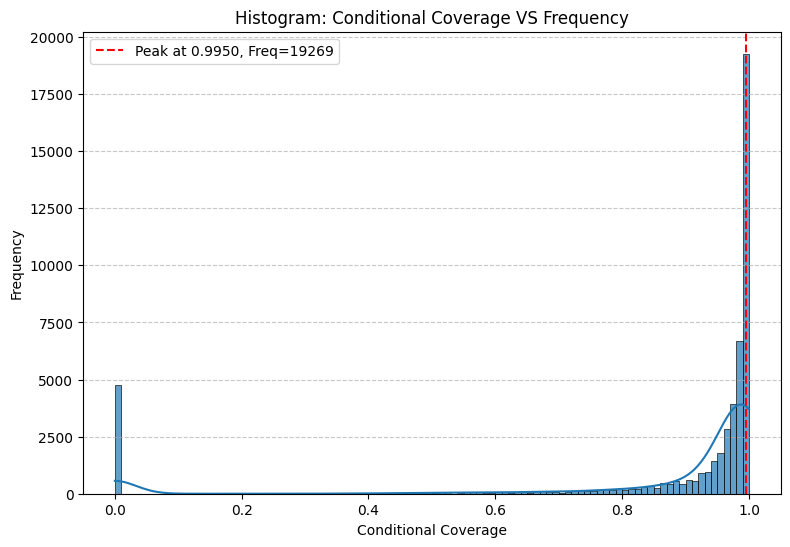

19269 (38.54%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=5.0, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4525 ± 0.0026
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8980 ± 0.0053
Final Average Real Probability: 0.8699 ± 0.0052


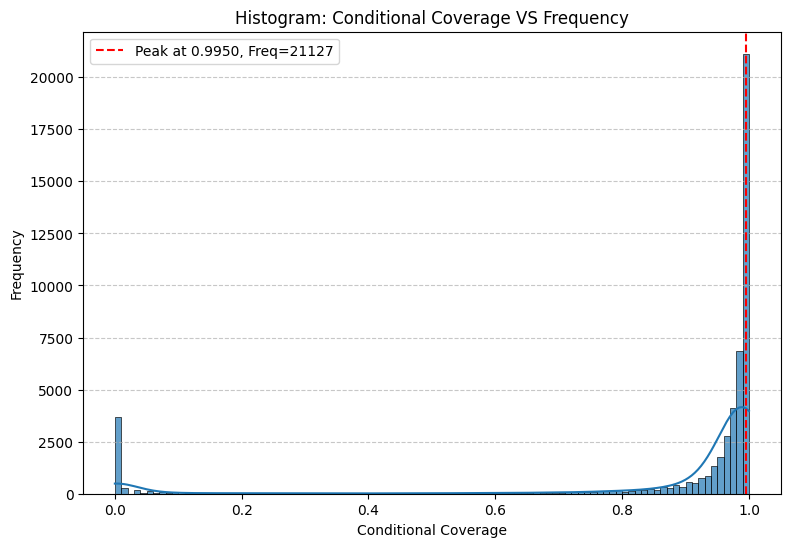

21127 (42.25%) samples reached the peak conditional coverage at 0.9950


In [20]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4525 ± 0.0026
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8980 ± 0.0053
Final Average Real Probability: 0.8699 ± 0.0052


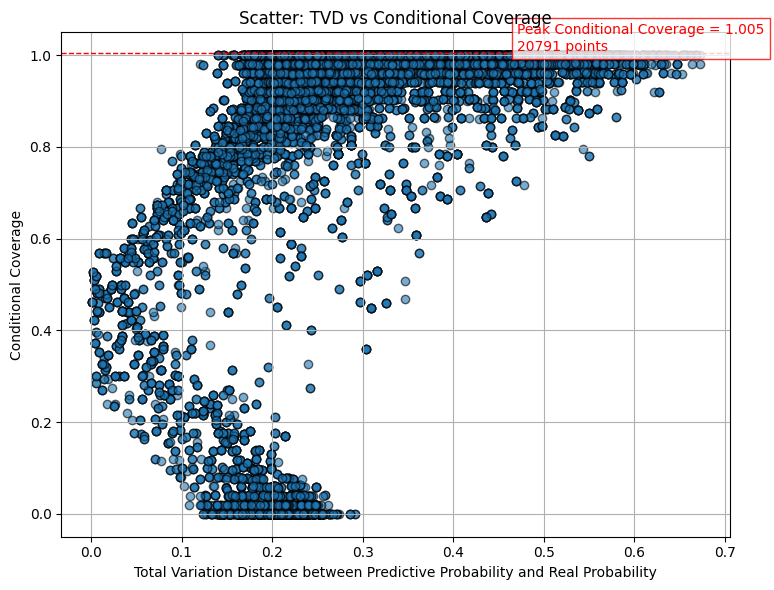

Peak Conditional Coverage = 1.005, with 20791 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.37133', '0.12001']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.33930', '0.12268']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.25024', '0.20344']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.24806', '0.24263']
  Real Probability Set      : ['0.68627', '0.01961']
Sample 2:
  Predictive Probability Set: ['0.29323', '0.11629']
  Real Probability Set      : ['0.10000', '0.62000']
Sample 3:
  Predictive Probability Set: ['0.24192', '0.15110', '0.14573']
  Real Probability Set      : ['0.62264', '0.00000', '0.00000']

--- Region 4: hig

In [22]:
aps_cifar10h_scatter(model, dataset, device, num_runs=10, alpha=0.1)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4686 ± 0.0030
Final Average Prediction Set Size: 1.01 ± 0.01
Final Average Coverage: 0.8986 ± 0.0049
Final Average Real Probability: 0.8692 ± 0.0048


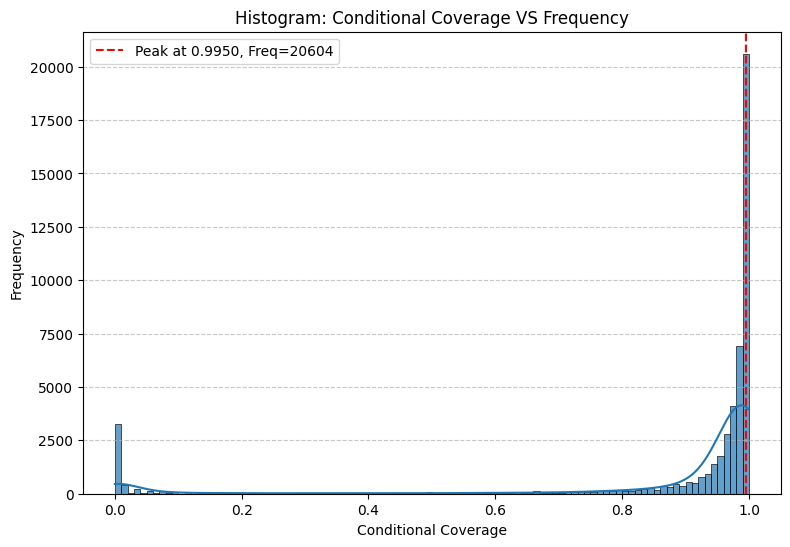

20604 (41.21%) samples reached the peak conditional coverage at 0.9950


In [23]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4686 ± 0.0030
Final Average Prediction Set Size: 1.01 ± 0.01
Final Average Coverage: 0.8986 ± 0.0049
Final Average Real Probability: 0.8692 ± 0.0048


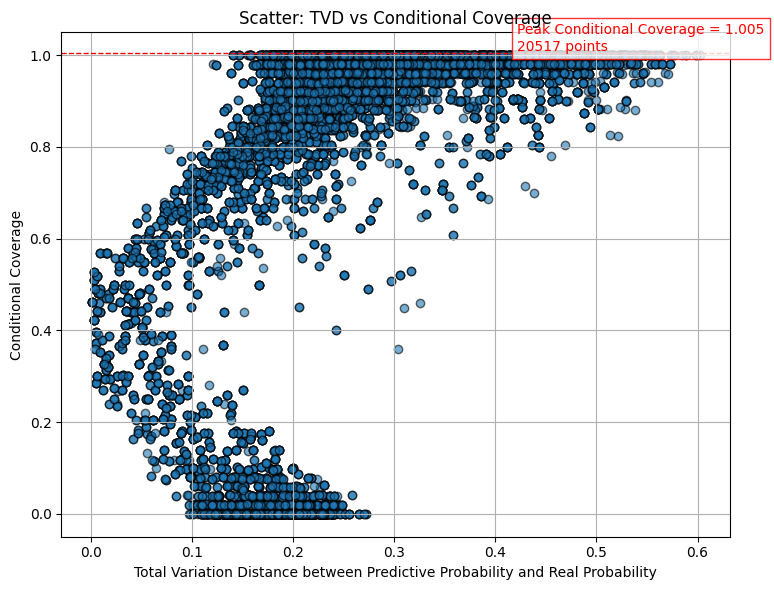

Peak Conditional Coverage = 1.005, with 20517 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.45317']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.41219']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.41808']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18570', '0.18371']
  Real Probability Set      : ['0.78431', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.22995', '0.22138']
  Real Probability Set      : ['0.00000', '0.65455']
Sample 3:
  Predictive Probability Set: ['0.29323', '0.11629']
  Real Probability Set      : ['0.10000', '0.62000']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.28128', '0.22349']


In [24]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4860 ± 0.0048
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9007 ± 0.0043
Final Average Real Probability: 0.8715 ± 0.0042


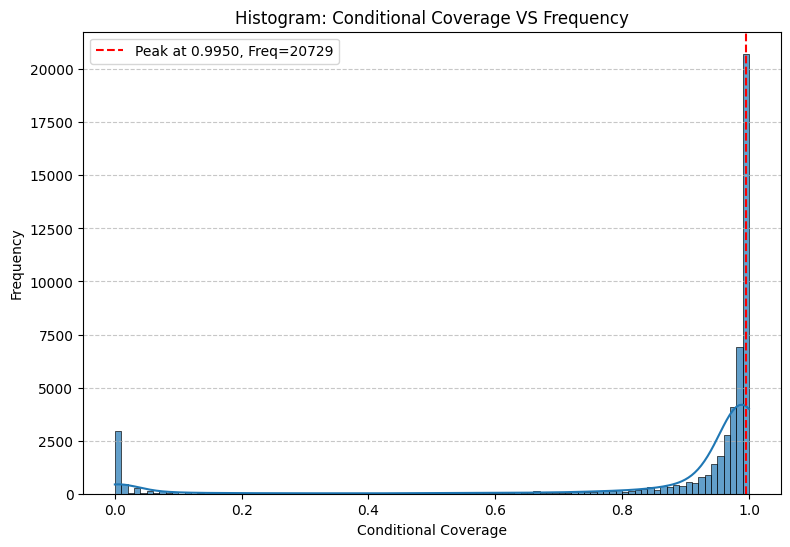

20729 (41.46%) samples reached the peak conditional coverage at 0.9950


In [25]:
saps_cifar10h_hist(model, dataset, device, lambda_=5.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4860 ± 0.0048
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9007 ± 0.0043
Final Average Real Probability: 0.8715 ± 0.0042


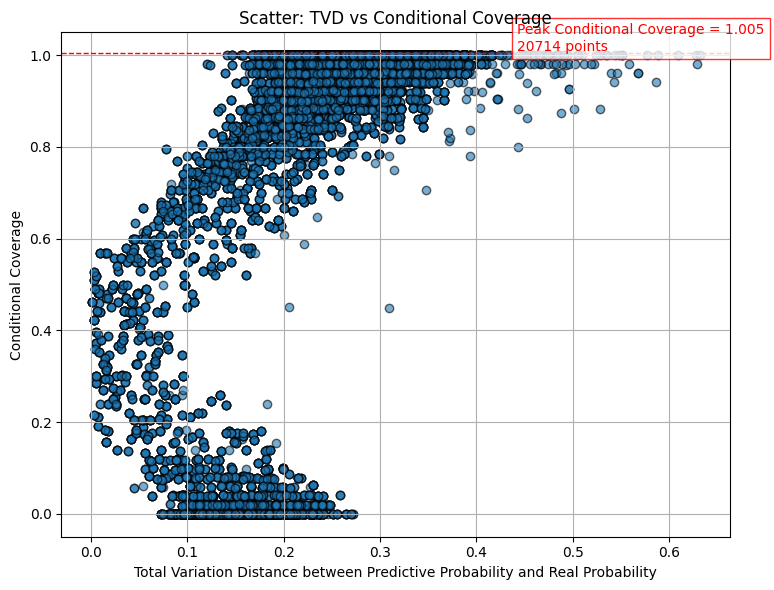

Peak Conditional Coverage = 1.005, with 20714 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.41672']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.22217', '0.22192']
  Real Probability Set      : ['0.01961', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.45165']
  Real Probability Set      : ['0.02000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.17990', '0.17362']
  Real Probability Set      : ['0.69231', '0.05769']
Sample 2:
  Predictive Probability Set: ['0.20628', '0.19529']
  Real Probability Set      : ['0.70588', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.33619', '0.17389']
  Real Probability Set      : ['0.78000', '0.00000']

--- Region 4: high TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: [

In [26]:
saps_cifar10h_scatter(model, dataset, device, lambda_=5.0, num_runs=10, alpha=0.1)